In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [23]:
# Read in both CSVs
df_red = pd.read_csv('winequality-red.csv')
df_white = pd.read_csv('winequality-white.csv')

In [24]:
df_red.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [25]:
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [26]:
## Data Cleaning 

In [27]:
# Compile lists containing null / na analyses, along with dType determinations

# Red, Null
null_red = list(df_red.isnull().sum())
null_red.extend(["Count Null","red"])

# White, Null
null_white = list(df_white.isnull().sum())
null_white.extend(["Count Null","white"])

# Red, NA
na_red = list(df_red.isna().sum())
na_red.extend(["Count NA","red"])

# White, NA
na_white = list(df_white.isna().sum())
na_white.extend(["Count NA","white"])

# Red dTypes
red_types = [x.name for x in df_red.dtypes]
red_types.extend(["dType","red"])

# White dTypes
white_types = [x.name for x in df_white.dtypes]
white_types.extend(["dType","white"])

# List of measurements by which the wine was analyzed
chem_analyses = list(df_white.columns.values)
chem_analyses.extend(["Analysis","Wine Type"])

In [28]:
# Missing Data

def percent_missing(data):
    return data.isnull().sum().divide(len(data)).sort_values(ascending=False)

percent_missing(df_red).head()
percent_missing(df_white).head()


fixed acidity       0.0
volatile acidity    0.0
citric acid         0.0
residual sugar      0.0
chlorides           0.0
dtype: float64

In [29]:
# Create DF with lists
analysis_df = pd.DataFrame([null_red,null_white,na_red,na_white,red_types,white_types],columns=chem_analyses)

In [30]:
# Set index to make multi-indexed DF
analysis_df.set_index(["Wine Type","Analysis"]).sort_index()

fixed acidity volatile acidity citric acid  \
Wine Type Analysis                                                
red       Count NA               0                0           0   
          Count Null             0                0           0   
          dType            float64          float64     float64   
white     Count NA               0                0           0   
          Count Null             0                0           0   
          dType            float64          float64     float64   

                     residual sugar chlorides free sulfur dioxide  \
Wine Type Analysis                                                  
red       Count NA                0         0                   0   
          Count Null              0         0                   0   
          dType             float64   float64             float64   
white     Count NA                0         0                   0   
          Count Null              0         0                   0   
          dType             float64   float64             float64   

                     total sulfur dioxide  density       pH sulphates  \
Wine Type Analysis                                                      
red       Count NA                      0        0        0         0   
          Count Null                    0        0        0         0   
          dType                   float64  float64  float64   float64   
white     Count NA                      0        0        0         0   
          Count Null                    0        0        0         0   
          dType                   float64  float64  float64   float64   

                      alcohol quality  
Wine Type Analysis                     
red       Count NA          0       0  
          Count Null        0       0  
          dType       float64   int64  
white     Count NA          0       0  
          Count Null        0       0  
          dType       float64   int64

In [31]:
## Data Exploration

In [32]:
# Quality 

In [33]:
# Add column to label wine type
df_red["type"] = 'red'
df_white["type"] = 'white'

In [34]:
# Quality Score Distribution 

In [35]:
# Count number of values per score, per wine type (normalize creates a percent of total value)
red_quality = df_red['quality'].value_counts(normalize=True)
white_quality = df_white['quality'].value_counts(normalize=True)

In [36]:
# Create empty DF for both wine types, and quality scores from 1 to 10
quality_perc = pd.DataFrame(columns=('Red','White'),index=list(range(1,11)))

# Input quality counts to DF
quality_perc['Red'] = red_quality
quality_perc['White'] = white_quality

# Fill blanks with 0's
quality_perc.fillna(0,inplace=True)

quality_perc

Red     White
1   0.000000  0.000000
2   0.000000  0.000000
3   0.006254  0.004083
4   0.033146  0.033279
5   0.425891  0.297468
6   0.398999  0.448755
7   0.124453  0.179665
8   0.011257  0.035729
9   0.000000  0.001021
10  0.000000  0.000000

Text(0, 0.5, '% of Total Wines, by Type')

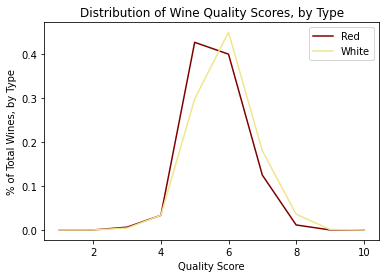

In [37]:
# Visualize 
colors = ['maroon','khaki']
ax = quality_perc.plot(color=colors,title="Distribution of Wine Quality Scores, by Type")
ax.set_xlabel("Quality Score")
ax.set_ylabel("% of Total Wines, by Type")

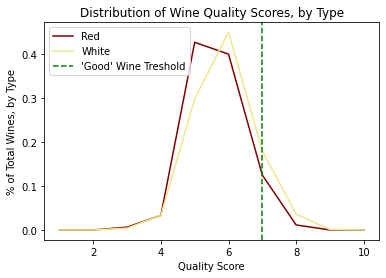

In [38]:
# Determine "Good" wine threshold 
colors = ['maroon','khaki']
ax = quality_perc.plot(color=colors,title="Distribution of Wine Quality Scores, by Type")
ax.set_xlabel("Quality Score")
ax.set_ylabel("% of Total Wines, by Type")

# threshold at 7
plt.axvline(7, color='g',linestyle='--')
plt.legend(["Red", "White","'Good' Wine Treshold"]);

In [64]:
# Preprocessing 

In [65]:
## Add Classification Column 

In [66]:
# If wine >= 7, label it "good"

df_red['class'] = ['good' if x >=7 else 'bad' for x in df_red['quality']]
df_white['class'] = ['good' if x >=7 else 'bad' for x in df_white['quality']]

df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type class  
0      9.4        5  red   bad  
1      9.8        5  red   bad  
2      9.8        5  red   bad  
3      9.8        6  red   bad  
4      9.4        5  red   bad

In [67]:
# Read in both CSVs

df_red.to_csv('red_classified.csv')
df_white.to_csv('white_classified.csv')

In [68]:
# Combine Dataframes

In [69]:
df_combined = df_red.append(df_white)
df_combined

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type class  
0         9.4        5    red   bad  
1         9.8        5    red   bad  
2         9.8        5    red   bad  
3         9.8        6    red   bad  
4         9.4        5    red   bad  
...       ...      ...    ...   ...  
4893     11.2        6  white   bad  
4894      9.6        5  white   bad  
4895      9.4        6  white   bad  
4896     12.8        7  white  good  
4897     11.8        6  white   bad  

[6497 rows x 14 columns]

In [70]:
df_combined.to_csv('combined_and_classified')

In [71]:
df_combined.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

In [72]:
# Data Exploration, Continued

In [73]:
df_combined = pd.concat([df_combined], axis=1)

print("Number of rows BEFORE merging:", df_red.shape[0])
print("Number of columns BEFORE merging:", df_red.shape[1])

print("Number of rows BEFORE merging:", df_white.shape[0])
print("Number of columns BEFORE merging:", df_white.shape[1])

print("\nNumber of rows AFTER merging:", df_combined.shape[0])
print("Number of columns AFTER merging:", df_combined.shape[1])


Number of rows BEFORE merging: 1599
Number of columns BEFORE merging: 14
Number of rows BEFORE merging: 4898
Number of columns BEFORE merging: 14

Number of rows AFTER merging: 6497
Number of columns AFTER merging: 14


In [74]:
# Get the number of white and red
new_count = df_combined.groupby(["type"]).count()["class"]
new_count.head()

type
red      1599
white    4898
Name: class, dtype: int64

In [75]:
# Get average quality
avg = df_combined.groupby(["type"]).mean()["quality"]
avg.head()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [76]:
# Get average pH
avg = df_combined.groupby(["type"]).mean()["pH"]
avg.head()

type
red      3.311113
white    3.188267
Name: pH, dtype: float64

In [77]:
# Outliers

In [78]:
df_combined.describe()[['quality','alcohol','sulphates','density']]

quality      alcohol    sulphates      density
count  6497.000000  6497.000000  6497.000000  6497.000000
mean      5.818378    10.491801     0.531268     0.994697
std       0.873255     1.192712     0.148806     0.002999
min       3.000000     8.000000     0.220000     0.987110
25%       5.000000     9.500000     0.430000     0.992340
50%       6.000000    10.300000     0.510000     0.994890
75%       6.000000    11.300000     0.600000     0.996990
max       9.000000    14.900000     2.000000     1.038980

In [79]:
# Bar Graphs

<AxesSubplot:>

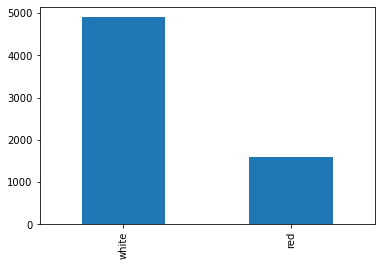

In [80]:
df_combined['type'].value_counts()
df_combined['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

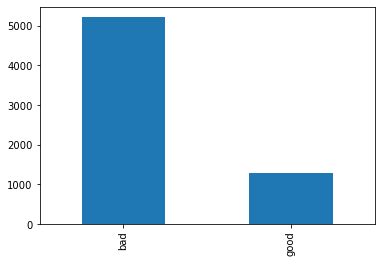

In [81]:
df_combined['class'].value_counts()
df_combined['class'].value_counts().plot(kind='bar')

In [87]:
# Histogram

In [62]:
# Boxplot

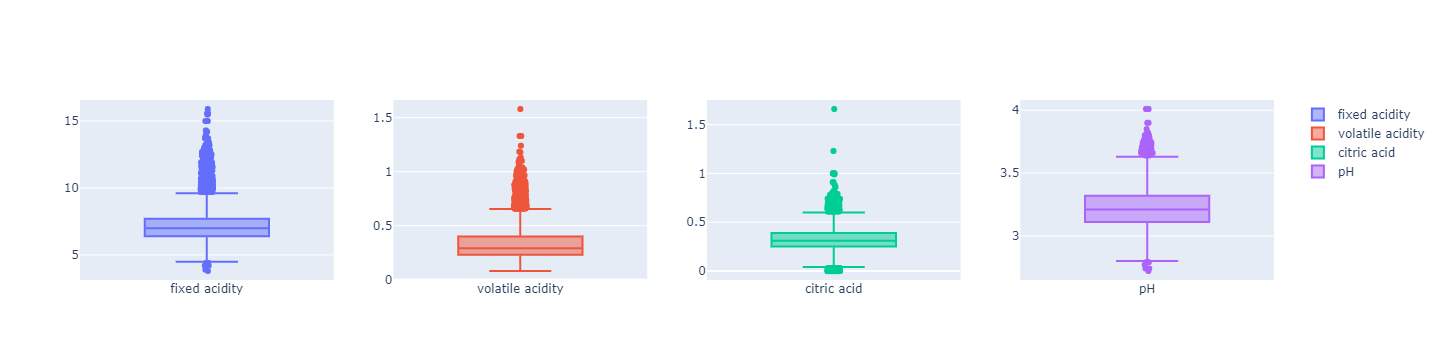

In [63]:
vars = ['fixed acidity', 'volatile acidity', 'citric acid','pH']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df_combined[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='outliers', jitter=.1)

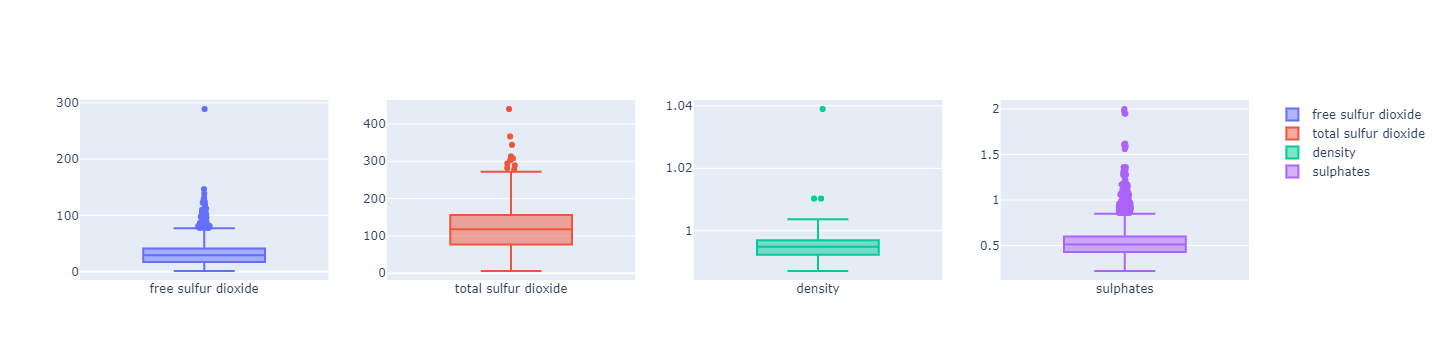

In [83]:
vars = ['free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates',]
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df_combined[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='outliers', jitter=.1)

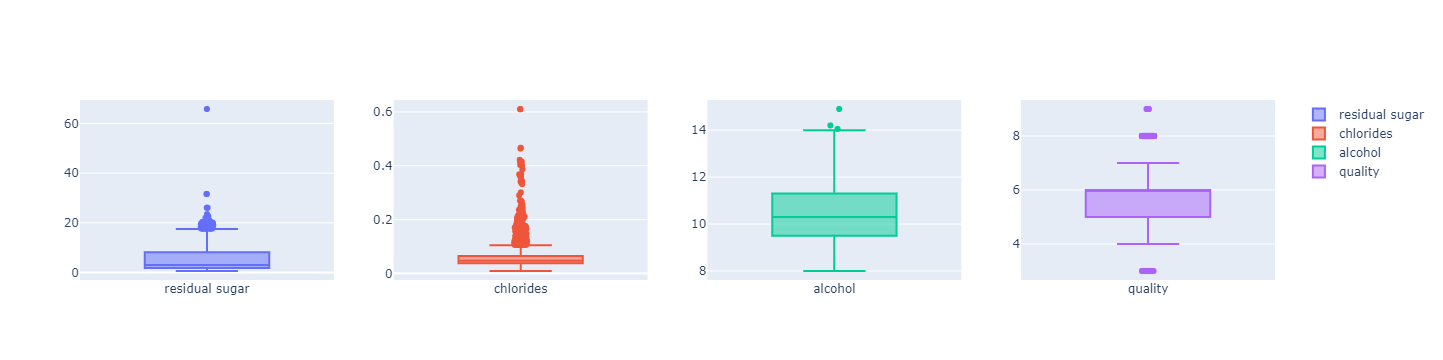

In [84]:
vars = ['residual sugar', 'chlorides', 'alcohol','quality']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df_combined[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='outliers', jitter=.1)

In [85]:
# Scatter

NameError: name 'plot' is not defined

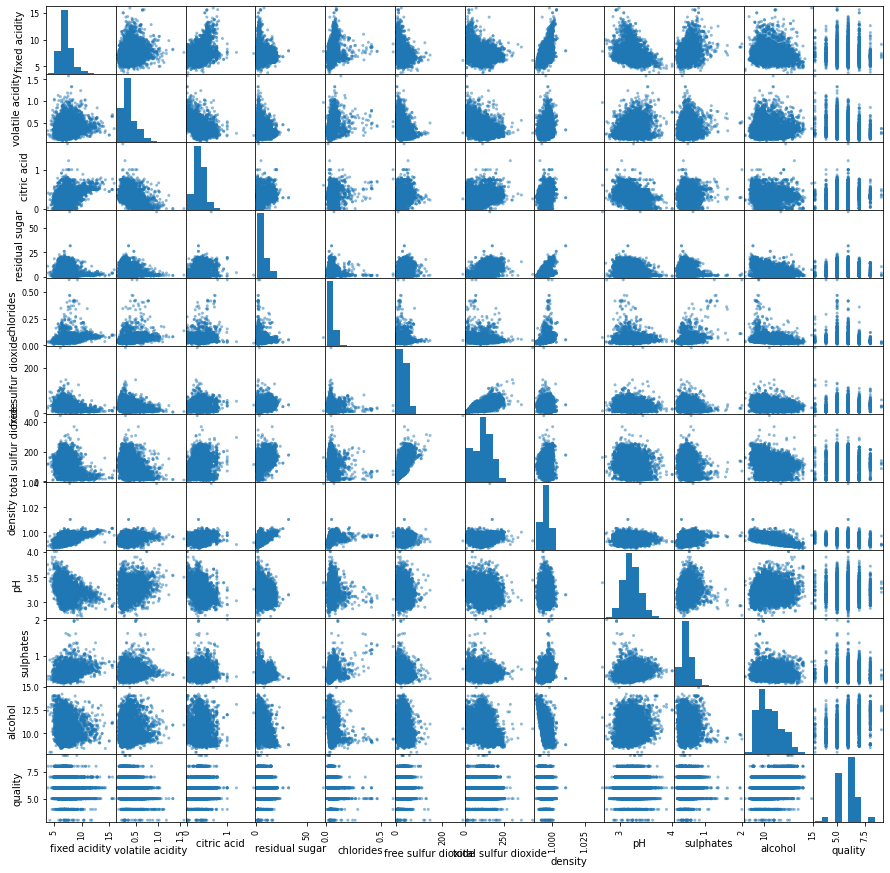

In [86]:
Scatter_df = df_combined[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                      'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol', 'quality','type', 'class']]

pd.plotting.scatter_matrix(Scatter_df, figsize=(15,15), diagonal='hist')

plot.show()

In [101]:
# Heatmap

<AxesSubplot:>

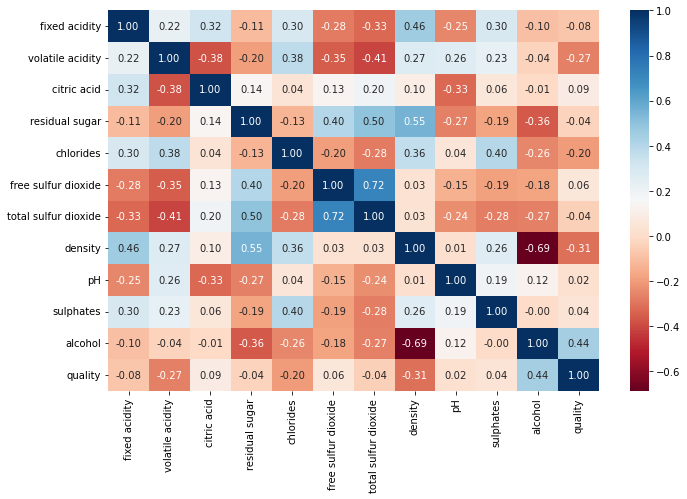

In [102]:
corr = Scatter_df.corr()

plt.figure(figsize=(11,7))
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu")

In [103]:
# Split into training and testing

In [116]:
# Partition data into training (70%) and testing (20%)
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)

#Standardize independent variables in ALL data (zero mean and unit variance)
std_X_train = StandardScaler().fit_transform(train_X)
std_X_test = StandardScaler().fit_transform(test_X)

std_train_df = pd.DataFrame(std_X_train, columns=train_X.columns)
std_test_df = pd.DataFrame(std_X_test, columns=test_X.columns)

std_X_df.head()

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.35684185  0.54491156 -0.33496715 ...  0.2416509  -0.3079933
  1.85225674].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from dmba import plotDecisionTree

# Parameters for grid search
parameters = {
    'max_depth': list(range(2, 11)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011],
}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(train_X, train_y)

# Best decision tree from the grid search
best_tree = grid_search.best_estimator_

# PLot the best tree
#plotDecisionTree(best_tree, feature_names=train_X.columns)

# Decision Tree (Best) class label for training and testing data
dt_pred_train = best_tree.predict(train_X)
dt_pred_test = best_tree.predict(test_X)

C:\Users\joroz\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan 

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.35684186  0.54491156 -0.33496714 ...  0.2416509  -0.3079933
  1.8522568 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [121]:
# Decision Trees- Using all variables in taining to predict
# Keep getting a GridSearchCV error

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# user grid search to find optimized tree
dt_grid = {
    'max_depth': [5, 10, 15], 
    'min_impurity_decrease': [0, 0.001], 
    'min_samples_split': [10, 15, 20], 
}

dt_gs = GridSearchCV(DecisionTreeRegressor(random_state=28), dt_grid, cv=10, n_jobs=-1)
dt_gs.fit(train_X, train_y)

# Best decision tree from the grid search
best_dt = dt_gs.best_estimator_

# Print best parameters of decision trees
print('Best parameters: ', dt_gs.best_params_)

In [ ]:
# Logistic Regression, Knn and LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# fit kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(std_train_df, train_y)

# fit discriminant analysis model
da = LinearDiscriminantAnalysis()
da.fit(train_X, train_y)

# fit a logistic regression
log = LogisticRegression(fit_intercept=True, C=1e42, solver='liblinear')
log.fit(train_X, train_y)

In [ ]:
# kNN class label for training and testing data
knn_pred_train = knn.predict(std_train_df)
knn_pred_test = knn.predict(std_test_df)

# discriminant analysis class label for training and testing data
da_pred_train = da.predict(train_X)
da_pred_test = da.predict(test_X)

# discriminant analysis class label for training and testing data
log_pred_train = log.predict(train_X)
log_pred_test = log.predict(test_X)

# Summary of training data predictions
pred_summary = pd.DataFrame({"Actual_Class": train_y, "kNN_Prediction": knn_pred_train,\
                             "DA_Prediction":da_pred_train,\
                             "Logistic_Prediction":log_pred_train})

print("Class predictions for training data")
pred_summary.head(10)

In [ ]:
# Model Evaluation

In [ ]:
# Regression Tree Model Prediction

In [ ]:
from dmba import regressionSummary

rt_pred_train = dt_model_5.predict(train_X[dt_vars_5])
rt_pred_test = dt_model_5.predict(test_X[dt_vars_5])

# Summary of training data predictions
pred_summary = pd.DataFrame({"Actual_Prediction": train_y,
                             "RT_Prediction":rt_pred_train})

print("Predictions for training data")
pred_summary.head(10)

# Model evaluation
print("****** TRAINING DATA ********")
regressionSummary(train_y, rt_pred_train)

print("\n****** TESTING DATA ********")
regressionSummary(test_y, rt_pred_test)